# Visuals Examples:

- [Load Libraries and Get Data](#init)
- [Data Analysis Using High Level Class](#data_ana_class)
- [Data Analysis Using Low Level Functions](#data_ana_functions)




## Load libraries and get data  <a id='init'></a>

For these examples, we will be using teh NFL dataset: https://www.kaggle.com/datasets/maxhorowitz/nflplaybyplay2009to2016


In [21]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from matplotlib import style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from instrumentum.analysis.dashboards import dashboard_continuos_with_binary_target, dashboard_categorical_with_binary_target
from instrumentum.analysis.plots import plot_continuos_bin_with_binary_target, plot_value_distribution, plot_value_heatmap

from instrumentum.analysis.distribution_analyzer import DistAnalyzer

# Standard visuals
sns.set_style('ticks')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Data to be used for these examples
df = pd.read_csv("sample_data/01_sample_NFL.csv")

# To have a "cluster" effect, we will use the season
# only two years to be used to make things simpler
df = df[df['Season'].isin([2009, 2015])]

/var/folders/3w/bsb667zn42gdhbqq3z8ptmgw0000gn/T/ipykernel_15431/1848956371.py:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sample_data/01_sample_NFL.csv")


## Data Analysis using high level class <a id='data_ana_class'></a>

EPA looks continuos
EPA looks skewed. Using quartiles
Outliers removed:  7006  %:  0.07722237531000276
Touchdown_Prob looks continuos
Touchdown_Prob looks skewed. Using quartiles
Outliers removed:  1032  %:  0.01137503444475062
PlayType looks categorical


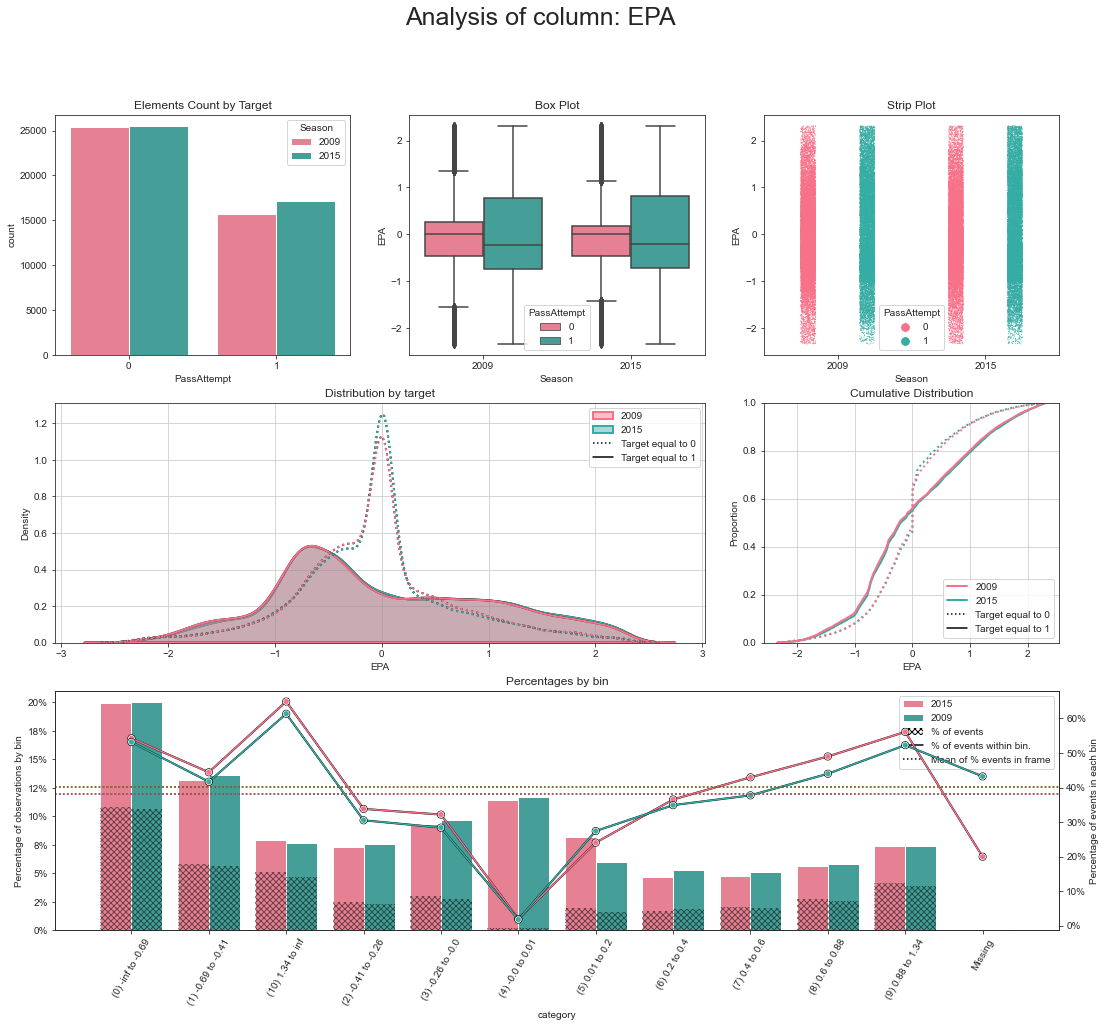

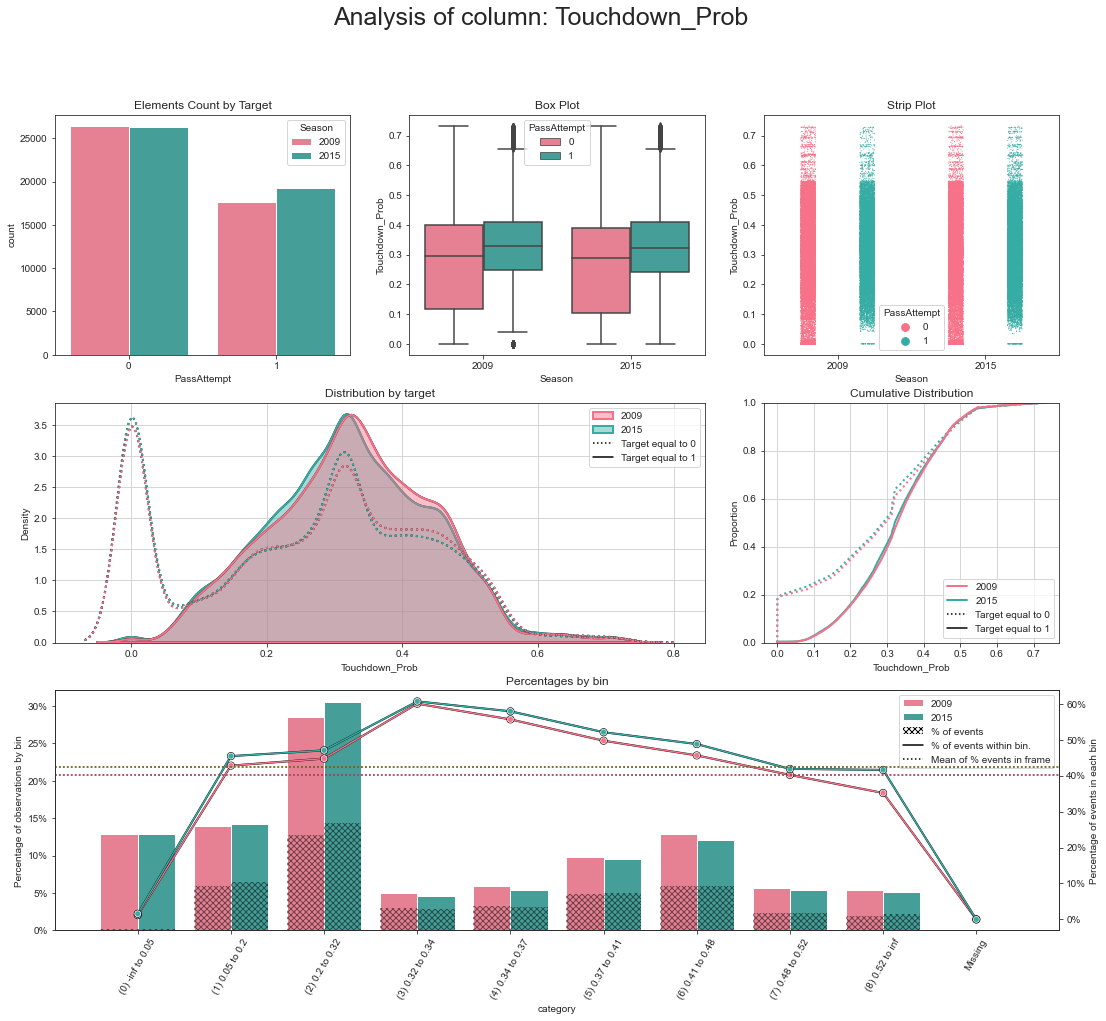

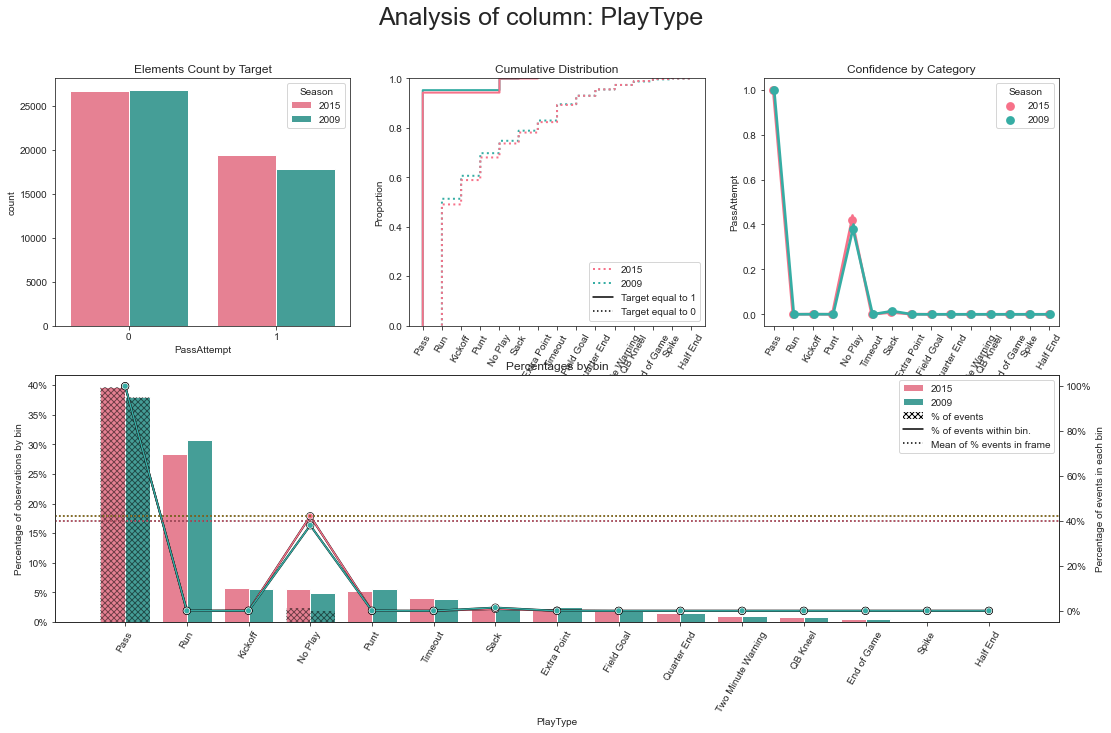

In [15]:
da = DistAnalyzer(df, y='PassAttempt', y_type="category_binary", y_true=1, cluster="Season")

# The class will attempt to identify the type of each column and procude the dashboard 
# that makes sense (so far it is limited, not all type of columns and targets are supported)
# it mostly works with binary targets
da.show_dashboard(xs=["EPA", "Touchdown_Prob", "PlayType"], keep_outliers=False)

EPA looks continuos


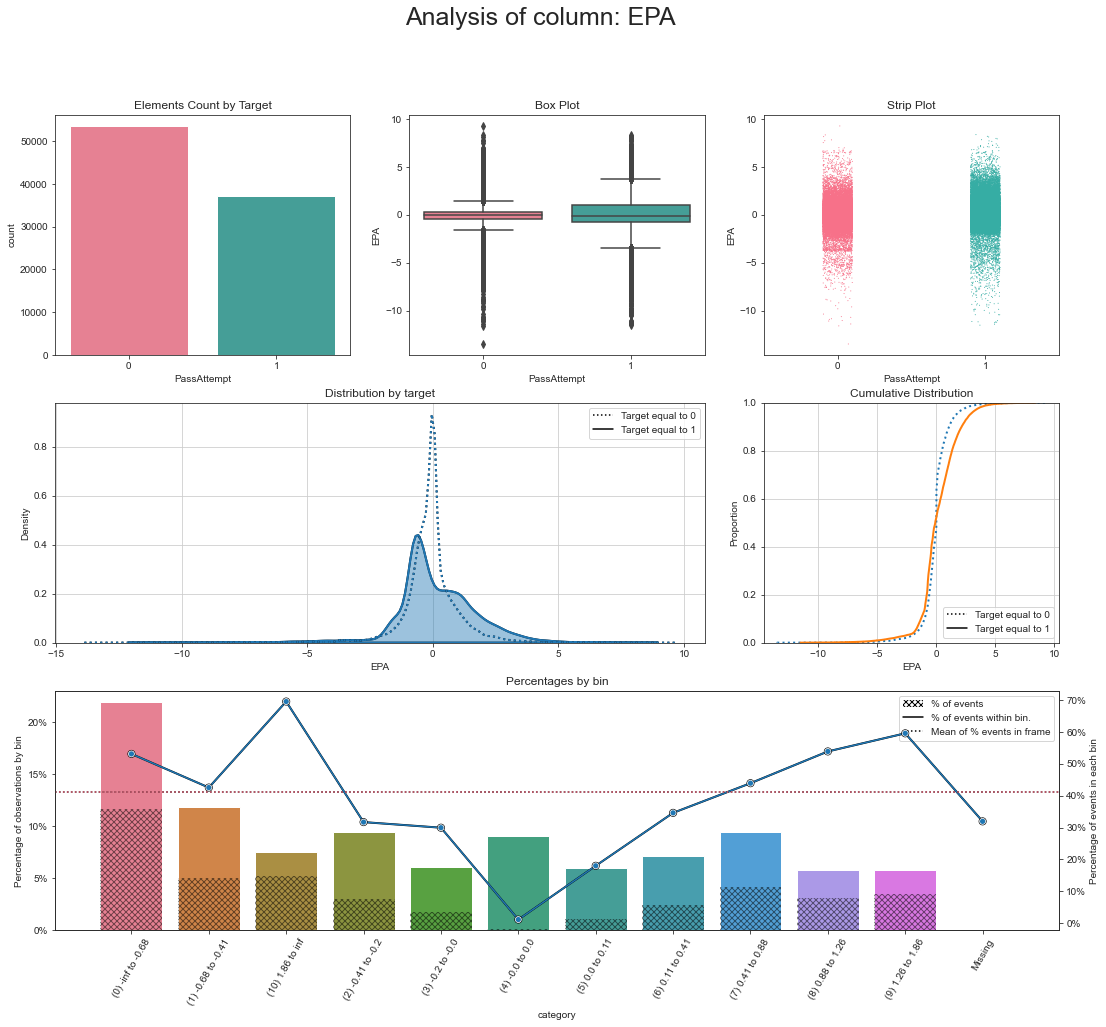

In [16]:
# Cluster is not really needed, we can skip it and the dashboard will adapt to that
da = DistAnalyzer(df, y='PassAttempt', y_type="category_binary", y_true=1)

# Same column as before, skipping the cluster, and keeping the outliers (compare with previous dashboard)
da.show_dashboard(xs=["EPA"], keep_outliers=True)

## Data Analysis Using Low Level Functions <a id='data_ana_functions'></a>

Date          0.00
GameID        0.00
Drive         0.00
qtr           0.00
down        139.46
             ...  
Win_Prob     59.92
WPA          13.88
airWPA      260.22
yacWPA      260.22
Season        0.00
Length: 102, dtype: float64
60


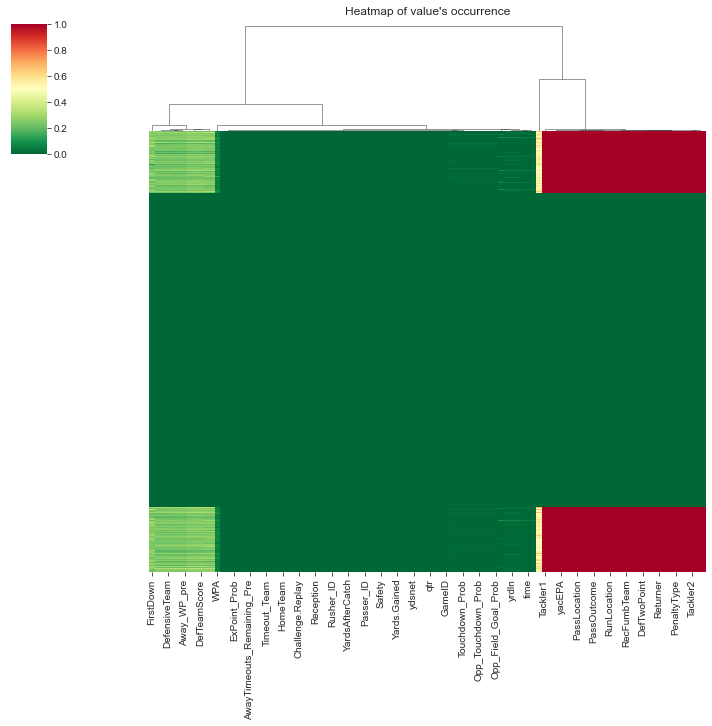

In [45]:
# Find NANs distribution

def pre_process(df, cluster, target):

    df.sort_values(by=["CLUSTER_SD_NAN"], inplace=True, ascending=False)
    return df.head(20)

fig, ax = plt.subplots(figsize=(12,5))
# plot_value_distribution(df, ax, cluster="Season", y="PassAttempt", call_back_pre_process=pre_process, remove_non_nan_cols=True)

plot_value_heatmap(df)

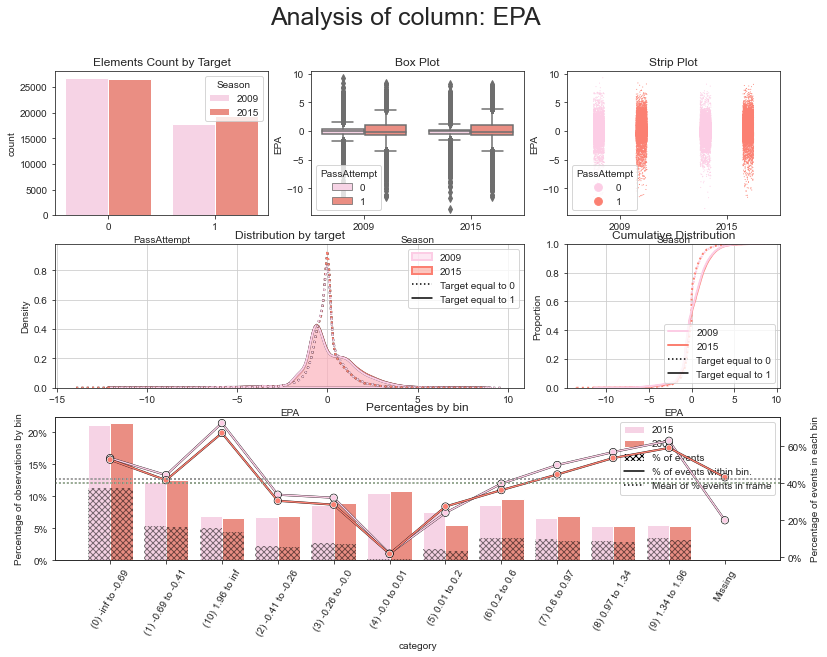

In [19]:
# Using the dashboard plots directly
fig1 = dashboard_continuos_with_binary_target(df, x="EPA", y="PassAttempt", cluster="Season", palette="Set3_r")
fig1.set_size_inches(13, 9)

plt.show()

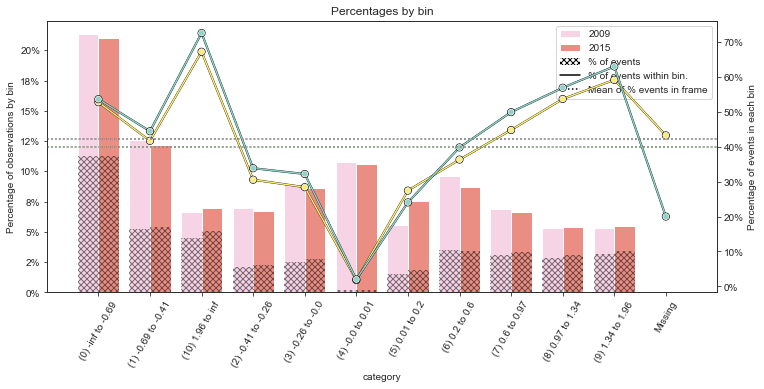

In [18]:
# Even lower, the plot one of the plots directly
# we have to create the ax in this case
fig, ax = plt.subplots(figsize=(12,5))
plot_continuos_bin_with_binary_target(df, ax=ax, x="EPA", y="PassAttempt", cluster="Season", master_clust=2009, palette="Set3_r")